#Analyzing the Impact of Lifestyle Habits on Academic Performance

###Importing libraries

In [57]:
"""
To work with datasets:
"""
import pandas as pd
"""
To work with arrays:
"""
import numpy as np
"""
To work with plots:
"""
import matplotlib.pyplot as plt
import seaborn as sbn
"""
Machine Learning
"""
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

###Importing data

In [58]:
Data = pd.read_csv("/content/student_habits_performance.csv")
Data.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


###Data preprocessing

In [59]:
Data.shape

(1000, 16)

In [60]:
#Exclude the student_id of dataset
Data = Data.drop(columns=['student_id'])

Missing data

In [61]:
Data.isnull().sum()

,0
age,0
gender,0
study_hours_per_day,0
social_media_hours,0
netflix_hours,0
part_time_job,0
attendance_percentage,0
sleep_hours,0
diet_quality,0
exercise_frequency,0


We have 91 missing records in parental_education_level. This feature is not numeric, so we will delete the rows with null records in parental_education_level.

In [62]:
#delete the rows with null records in parental_education_level.
Data = Data.dropna(subset=['parental_education_level'])
Data.shape

(909, 15)

Dtypes

In [63]:
Data.dtypes

,0
age,int64
gender,object
study_hours_per_day,float64
social_media_hours,float64
netflix_hours,float64
part_time_job,object
attendance_percentage,float64
sleep_hours,float64
diet_quality,object
exercise_frequency,int64


General descrition

In [64]:
Data.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000
mean,20.475248,3.538724,2.504620,1.830363,83.880308,6.474037,3.051705,5.466447,69.558196
std,2.302721,1.469730,1.164802,1.071251,9.453622,1.218943,2.035632,2.857525,16.929436
min,17.000000,0.000000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.000000,2.500000,1.700000,1.000000,77.500000,5.600000,1.000000,3.000000,58.400000
50%,20.000000,3.500000,2.500000,1.800000,84.200000,6.500000,3.000000,5.000000,70.400000
75%,22.000000,4.500000,3.300000,2.600000,90.700000,7.300000,5.000000,8.000000,81.300000
max,24.000000,8.300000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


Boxplots

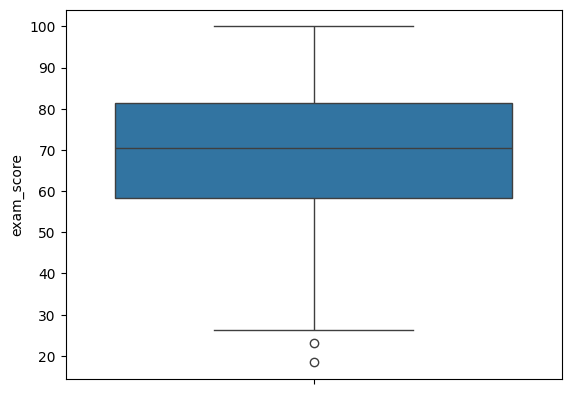

In [65]:
#Boxplot for exam_score
sbn.boxplot(Data["exam_score"])
plt.show()

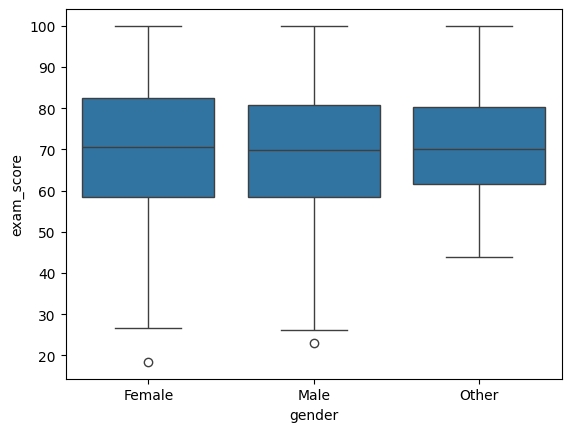

In [66]:
#Boxplot for exam_score with gender
sbn.boxplot(x="gender", y="exam_score", data=Data)
plt.show()

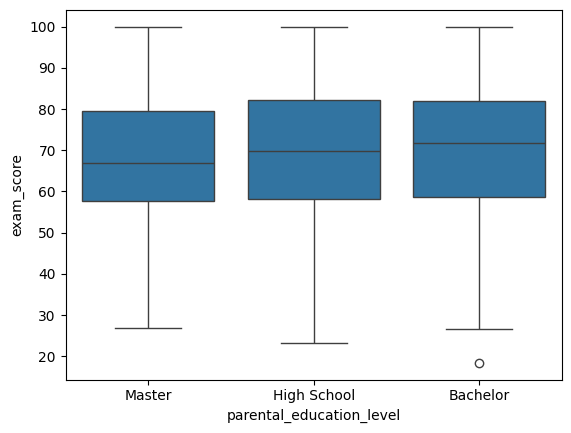

In [67]:
#Boxplot for exam with parental_education_level
sbn.boxplot(x = "parental_education_level", y = "exam_score", data = Data)
plt.show()

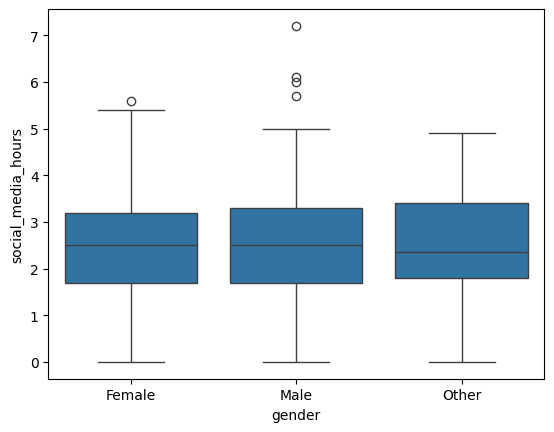

In [68]:
#Boxplot for social_media_hours with gender
sbn.boxplot(x="gender", y = "social_media_hours", data = Data)
plt.show()

Gender codification

In [69]:
#Female = 0, Male = 1, Other = 2
Data['gender'] = Data['gender'].replace(['Female', 'Male', 'Other'], [0, 1, 2])

<ipython-input-69-66ad63eb5c04>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Data['gender'] = Data['gender'].replace(['Female', 'Male', 'Other'], [0, 1, 2])


part_time_job codification

In [70]:
#No = 0, Yes = 1
Data["part_time_job"] = Data["part_time_job"].replace(["No", "Yes"], [0, 1])

<ipython-input-70-2bea369448e2>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Data["part_time_job"] = Data["part_time_job"].replace(["No", "Yes"], [0, 1])


diet_quality codification

In [71]:
#['Fair', 'Good', 'Poor'] = [0, 1, 2]
Data["diet_quality"] = Data["diet_quality"].replace(["Fair", "Good", "Poor"], [0, 1, 2])

<ipython-input-71-c457db5a2c95>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Data["diet_quality"] = Data["diet_quality"].replace(["Fair", "Good", "Poor"], [0, 1, 2])


parental_education_level codification

In [72]:
#['Master', 'High School', 'Bachelor'] = [0, 1, 2]
Data["parental_education_level"] = Data["parental_education_level"].replace(["Master", "High School", "Bachelor"], [0, 1, 2])

<ipython-input-72-03fd8e265ec5>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Data["parental_education_level"] = Data["parental_education_level"].replace(["Master", "High School", "Bachelor"], [0, 1, 2])


internet_quality codification

In [73]:
#['Average', 'Poor', 'Good'] = [0, 1, 2]
Data["internet_quality"] = Data["internet_quality"].replace(["Average", "Poor", "Good"], [0, 1, 2])

<ipython-input-73-37f245ab5fe3>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Data["internet_quality"] = Data["internet_quality"].replace(["Average", "Poor", "Good"], [0, 1, 2])


extracurricular_participation codification

In [74]:
Data["extracurricular_participation"] = Data["extracurricular_participation"].replace(["No", "Yes"], [0, 1])

<ipython-input-74-dbb3bb9ea855>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Data["extracurricular_participation"] = Data["extracurricular_participation"].replace(["No", "Yes"], [0, 1])


###Data analysis

Mapa de correlações

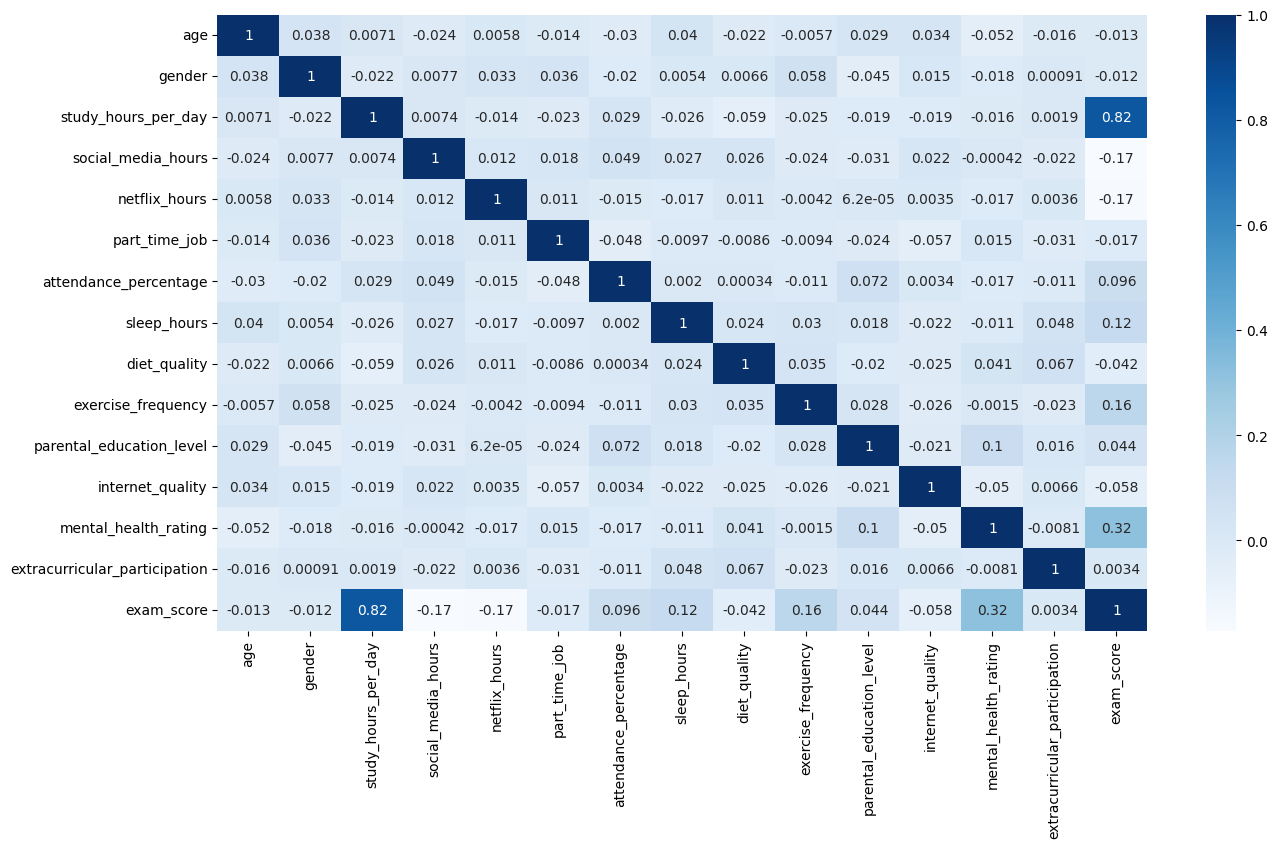

In [75]:
#heatmap
plt.figure(figsize = (15, 8))
sbn.heatmap(Data.corr(), annot = True, cmap = "Blues")
plt.show()

A strong positive correlation of 0.82 was found between study hours and final exam scores, suggesting that students who dedicate more time to studying tend to achieve significantly higher results on their exams.

study_hours_per_day	 vs. exam_score

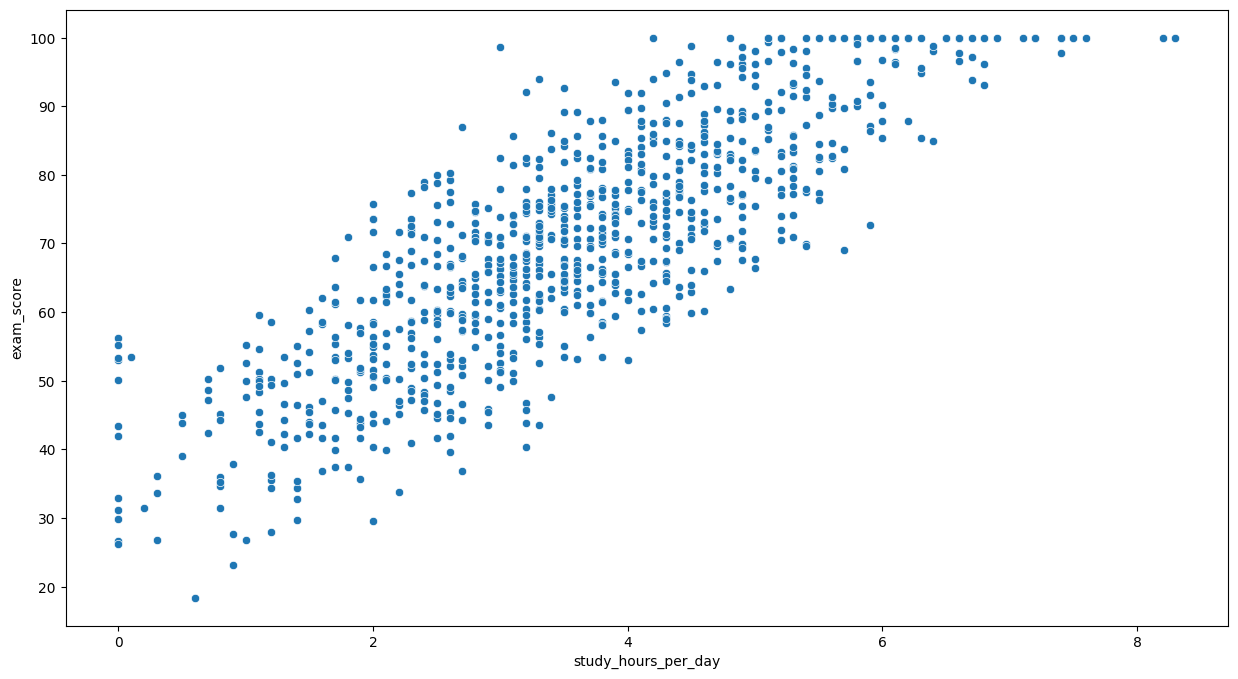

In [76]:
#Study_hours_per_day vs. exam_score
plt.figure(figsize = (15, 8))
sbn.scatterplot(x = "study_hours_per_day", y = "exam_score", data = Data)
plt.show()

It should be noted that the number of hours studied, although it has a strong impact on exam performance, alone, this characteristic cannot clearly define a good or bad student. For example, many students study 4 hours a day, but not all of them do well on the exam.

##Machine Learning

Data split

In [77]:
#Data split
x = Data.drop(columns = ["exam_score"])
y = Data["exam_score"]
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, random_state = 42)

Linear regression

In [78]:
Linear_regression = LinearRegression()
Linear_regression.fit(x_treino, y_treino)

LinearRegression()

Prediction

In [79]:
#prediction
y_pred = Linear_regression.predict(x_teste)

$$\text{R}^2 \ \text{score}$$

The R² score (also called the coefficient of determination) is a metric that tells you how well a regression model explains the variability of the target variable.

🔍 Interpretation:
R² = 1: Perfect prediction — the model explains 100% of the variance in the target.

R² = 0: The model does no better than simply predicting the mean of the target.

R² < 0: The model is worse than predicting the mean — it's a poor fit.

In [81]:
print(r2_score(y_teste, y_pred))

0.8891247099218008


Great! An R² score of 0.889 means your regression model explains about 88.9% of the variance in the final exam scores based on the input features (like study hours, sleep, etc.).

$$\text{Mean Square Error}$$
$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$


In [82]:
print(mean_squared_error(y_teste, y_pred))

30.09521725781994


The model achieved a **Mean Squared Error (MSE)** of **30.10**, which indicates the average squared difference between the predicted and actual exam scores. Taking the square root, the **Root Mean Squared Error (RMSE)** is approximately **5.49**, meaning the model's predictions are, on average, about 5.5 points away from the actual scores. Given that exam scores range from 0 to 100, this reflects a fairly accurate model.
